In [1]:
%matplotlib inline


Dimer Bethe lattice
===================

Non interacting dimer of a Bethe lattice



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dmft.common as gf
import dmft.dimer as dimer

plt.rcParams.update({'font.size': 16})

Real frequency spectral function
================================



Text(0, 0.5, '$A(\\omega)$')

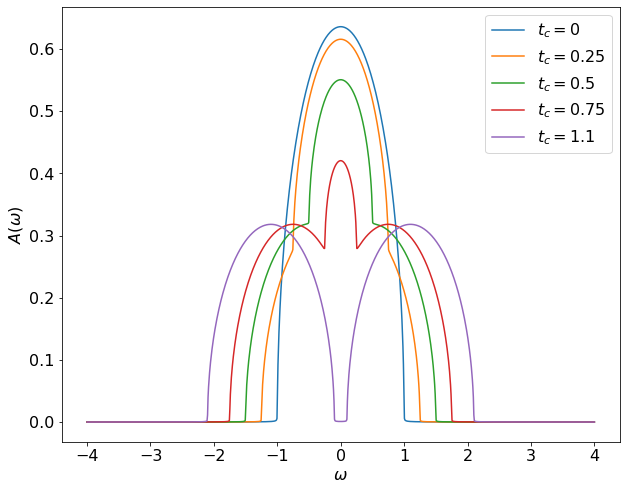

In [3]:
w = 1e-3j + np.linspace(-4, 4, 2**10)
mu, t = 0, 0.5
t2 = t**2

plt.figure(figsize=(10,8))
for tab in [0, 0.25, 0.5, 0.75, 1.1]:

    Gd, Gc = dimer.gf_met(-1j * w, mu, tab, t, 0.)
    Gd, Gc = dimer.self_consistency(w, Gd, Gc, mu, tab, t2)

    plt.plot(w.real, -Gd.imag / np.pi, label=r'$t_c={}$'.format(tab))
#    plt.plot(w.real, Gd.real, label=r'$\Re e Gd$')
#    plt.plot(w.real, Gc.real, label=r'$\Re e Gc$')
#    plt.plot(w.real, Gc.imag, label=r'$\Im m Gc$')

plt.legend(loc=0)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\omega)$')

Matsubara frequency Green's function
====================================



Text(0, 0.5, '$G(i\\omega_n)$')

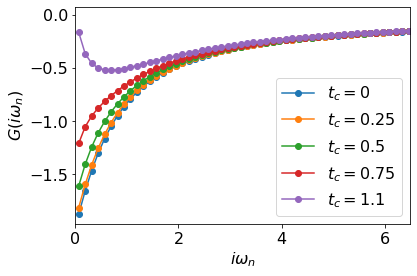

In [4]:
w_n = gf.matsubara_freq(50., 512)
iw_n = 1j * w_n
plt.figure()
for tab in [0, 0.25, 0.5, 0.75, 1.1]:

    Gd, Gc = dimer.gf_met(w_n, mu, tab, t, 0.)
    Gd, Gc = dimer.self_consistency(iw_n, Gd, Gc, mu, tab, t2)

    plt.plot(w_n, Gd.imag, 'o-', label=r'$t_c={}$'.format(tab))

plt.legend(loc=0)
plt.xlim([0, 6.5])
plt.xlabel(r'$i\omega_n$')
plt.ylabel(r'$G(i\omega_n)$')